<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Здравствуйте!  
В данном проекте, будем следовать действиям и рекомендациям указаным выше.  
Вот **План работы над проектом**.

* Изучим данные.  
* Разобъём данные на тренировочную, валидационную и тестовую выборки.  
* Исследуем задачу.  
* Проверим модели на данных без изменений.
* Скоректируем балланс класса.
* Получим улучшенную модель. Поработаем с гиперпараметрами.
* Проведём финальный тест.
* Напишем вывод(ы).

## Подготовка данных

In [1]:
import pandas as pd #Импортируем библиотеку pandas для просмотра датесета.
import matplotlib.pyplot as plt #Импортируем библиотеку для просмотра графиков
import seaborn as sns #Импортируем библиотеку seaborn для построения графиков
from sklearn.model_selection import train_test_split # импортируем функции деления датасета
from sklearn.tree import DecisionTreeClassifier #Импортируем функцию решающее дерево
from sklearn.ensemble import RandomForestClassifier #Импортируем модель случайный лес
from sklearn.linear_model import LogisticRegression #Импортируем модель логистическая регрессия
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve #Импортируем библиотеки для просмотра метрик
from sklearn.utils import shuffle # Функция для перемешивания данных
from sklearn.preprocessing import StandardScaler #Функция для масштабирования численных признаков 

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head()) #просмотрим краткое содержание файла

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
display(df.tail(10)) #просмотрим краткое содержание последних строк файла

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
df.info() #Продолжим изучение, сделаем вывод ниже

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод**  

В нашем распоряжении 10 тыс. строк информации, 14 столбцов. Пропуска есть только в столбце *tenure* (сколько лет человек является клиентом банка). Эти данные нам неизвестны, их заполним нулями. Переведём и разъясним все признаки в таблице.

**Признаки**
* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — сколько лет человек является клиентом банка
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата  

**Целевой признак**
* *Exited* — факт ухода клиента

Можно предположить, что существует взаимосвязь между предпологаемой зарплатой и фактом ухода из банка (например, уход богатого или бедного клиента) или взаимосвязь кредитного рейтинга и ухода из данного банка (кредитный рейтинг низкий, банк не даёт кредит, клиент уходит), но инструмент корелляции работает только с количественными признаками, в нашем случае это не имеет смысла, т.к. *Exited* (факт ухода клиента), величина номинальная (1-0, да-нет).  

В тоже время, можно предположить, что есть взаимосвязь ухода из банка, в связи с возрастом клиента. Построим график.

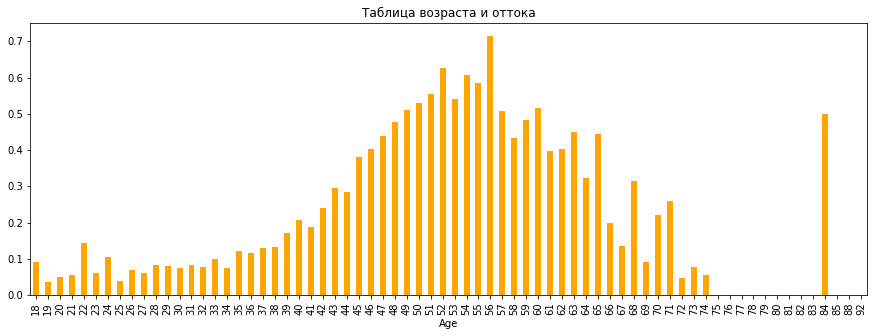

In [6]:
df.groupby('Age')['Exited'].mean().plot(figsize=(15,5),kind='bar', color='orange', title='Таблица возраста и оттока')
plt.show()

Глядя на таблицу, замечаем, что чем взрослее клиент, тем выше его вероятность ухода, это может быть связано с переездом, или же сменой жизненных интересов. Нельзя исключать влияние естесственных физиологических причин на уход из банка. 

Некоторые столбцы не имееют влияния на дальнейшее исследование: *RowNumber, CustomerId, Surname*. Невозможно, опираясь на эти данные, предсказать уйдёт ли клиент из банка. Удалим эти колонки.

In [7]:
df['Tenure'] = df['Tenure'].fillna(0) #Заполним пропуски

In [8]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1) #Удалим лишние столбцы
df.info() # И убедимся, что данные стали в порядке.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Пропуски заполнены, а количество столбцов сократилось с 14 до 11.

In [9]:
df = pd.get_dummies(df, drop_first=True) #Установим защиту от дамми-ловушек и фиктивных признаков.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Изучили, подчистили данные и поставили защиту от дамми-ловушек, приступим к исследованию.

## Исследование задачи

В данном проекте будем использовать 3 основные исследовательские модели:

* Решающее дерево  
* Случайный лес
* Логистическая регрессия

Разобьём данные про принципу **3**(*Обучающая*)/**1**(*Валидационная*)/**1**(*Тестовая*) (6000+2000+2000=10000 строк).

In [10]:
features = df.drop('Exited', axis=1) #Разделим данные на целевой признак и остальные признаки.
target = df['Exited']

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=123456 )

In [12]:
display(len(features_valid)) 
display(target_valid.shape) #Смотрим на размеры валидационной выборки

2000

(2000,)

In [13]:
display(features_test.shape)
display(target_test.shape) #Смотрим на размеры тестовой выборки

(2000, 11)

(2000,)

In [14]:
display(features_train.shape)
display(target_train.shape) #Смотрим на размеры обучающей выборки

(6000, 11)

(6000,)

Данные разделены верно. 3:1:1 (2000+2000+6000).  

Испытаем модель **Решающее Дерево**.

In [15]:
%%time

for depth in range(1,30,2): # Просмотрим глубину дерева до 30 уровня с шагом в 2 уровня.
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) # присваиваем модели имя
    model_tree.fit(features_train, target_train) # обучаем
    prediction_tree = model_tree.predict(features_valid) # получаем предсказания модели

    
    print('max_depth:',depth,end='')
    print(' F1-score', f1_score(target_valid, prediction_tree))
probabilities_valid = model_tree.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

max_depth: 1 F1-score 0.0
max_depth: 3 F1-score 0.40336134453781514
max_depth: 5 F1-score 0.5443959243085881
max_depth: 7 F1-score 0.5346820809248555
max_depth: 9 F1-score 0.5732984293193717
max_depth: 11 F1-score 0.5118601747815231
max_depth: 13 F1-score 0.5084745762711864
max_depth: 15 F1-score 0.49596309111880044
max_depth: 17 F1-score 0.484090909090909
max_depth: 19 F1-score 0.4927211646136618
max_depth: 21 F1-score 0.5011086474501109
max_depth: 23 F1-score 0.4916201117318436
max_depth: 25 F1-score 0.4916201117318436
max_depth: 27 F1-score 0.4916201117318436
max_depth: 29 F1-score 0.4916201117318436
AUC-ROC 0.6724042709867452
CPU times: user 348 ms, sys: 7.77 ms, total: 356 ms
Wall time: 365 ms


Наилучший F1 результат достигнут на 9 уровне. Также добились отличного времени - меньше полусекунды. 

Попробуем испытать модель **Случайный Лес**.

In [16]:
%%time

#Поправил код, убрал цикл из цикла, добавил правильный параметр для ROC-AUC Score.

best_f1=0
for est in range(57, 59):
    model = RandomForestClassifier(random_state=12345, max_depth=29, n_estimators=57)
    model.fit(features_train, target_train)
    predictions_forest = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:, 1]
    f1_model = f1_score(target_valid, predictions_forest)
        
    if f1_model > best_f1:
        best_model = model
        best_f1 = f1_model
        best_roc = roc_auc_score(target_valid, probabilities_valid)
        best_depth = depth
        best_est = est
  

print('F1', best_f1)
print('AUC-ROC', best_roc)
print('Лучшая глубина', best_depth)
print('n_estimators =', best_est)

F1 0.5702479338842976
AUC-ROC 0.8428741140463918
Лучшая глубина 29
n_estimators = 57
CPU times: user 740 ms, sys: 24.2 ms, total: 764 ms
Wall time: 775 ms


In [17]:
%%time

#И вот, на всякий случай, добавил этот код, с подобранными лучшими параметрами.

model_forest = RandomForestClassifier(n_estimators=57, max_depth=29, random_state=12345)
model_forest.fit(features_train, target_train)
prediction = model_forest.predict(features_valid)


print('F1', f1_score(target_valid, prediction))
probabilities_valid = model_forest.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

F1 0.5702479338842976
AUC-ROC 0.8428741140463918
CPU times: user 385 ms, sys: 16.6 ms, total: 402 ms
Wall time: 406 ms


Лучший результат F1 (*0.5702*) достигнут на N estimator 57, на уровне глубины 29. Результат ROC_AUC у данной модели *0.8428*.


Опробуем модель **Логическая Регрессия. Logistic Regression**

In [18]:
scaler = StandardScaler()

scaler.fit(features_train)
features_train_reg = scaler.transform(features_train)
features_valid_reg = scaler.transform(features_valid)
pd.options.mode.chained_assignment = None


display(features_train[:3])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1


In [19]:
%%time

model_regression =  LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_train_reg, target_train)
predicted_regression = model_regression.predict(features_valid_reg)
display('F1', f1_score(target_valid, predicted_regression))
display("AUC-ROC", roc_auc_score(target_valid, predicted_regression))

'F1'

0.3142857142857142

'AUC-ROC'

0.5837513807069219

CPU times: user 41.4 ms, sys: 79.1 ms, total: 120 ms
Wall time: 58.5 ms


Все использованные модели, к сожалению, показали крайне низкие результаты:  
    **Решающее дерево**: Глубина дерева 9, F1-score 0.57329, AUC-ROC 0.6724    
    **Случайный лес**: 57 дерево, Глубина 16 F1-score 0.5497, AUC-ROC 0.8450  
    **Логическая Регрессия**: F1-score 0.3142, AUC-ROC 0.5837

F1-score крайне низок у всех 3-х исследуемых моделей, тем не менее наилучший показатель кривой ошибок у **Случайного леса**. 
    
Скорее всего проблема кроется в балансе классов. В следующей главе посмотрим пропорции оставшихся и ушедших клиентов.

## Борьба с дисбалансом

In [20]:
target.value_counts() #Данные о количестве клиентов скрываются в целевом признаке.

0    7963
1    2037
Name: Exited, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64

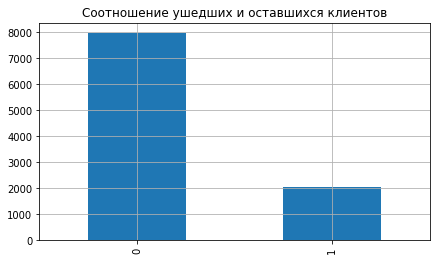

In [21]:
target.value_counts().plot(kind='bar', grid=True,figsize=(7,4),title='Соотношение ушедших и оставшихся клиентов')
target.value_counts() #Для убедительности и проверки, построим график

Дисбаланс классов достаточно велик - **1:4**. На одного ушедшего клиента, четыре остаются с банком.

Придадим объектам редкого класса больший вес. Для этого используем все предыдущие модели обучения, но поправим гиперпараметр **class_weight='balanced'**. Также будем осматривать все остальные необходимые метрики точности.

Модель **Решающее Дерево**.

In [22]:
%%time

f1_best = 0
depth_best = 0
for depth in range(1,30,2): # Просмотрим глубину дерева до 30 уровня с шагом в 2 уровня.
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # присваиваем модели имя
    model_tree.fit(features_train,target_train) # обучаем
    prediction_tree = model_tree.predict(features_valid) # получаем предсказания модели
    f1 = f1_score(target_valid, prediction_tree)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

#Рассмотрим все остальные необходимые метрики.

print('Accuracy', accuracy_score(target_valid, prediction_tree))
print('Precision', precision_score(target_valid, prediction_tree))
print('Recall', recall_score(target_valid, prediction_tree))
print('F1', f1_score(target_valid, prediction_tree))
probabilities_valid = model_tree.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

Max depth 5 F1-score 0.6104023552502453
Accuracy 0.7805
Precision 0.5108433734939759
Recall 0.4732142857142857
F1 0.49130938586326767
AUC-ROC 0.6712076583210603
CPU times: user 425 ms, sys: 3.68 ms, total: 428 ms
Wall time: 437 ms


Модель **Случайный Лес**.

In [23]:
%%time

for est in range(88, 95):
    model_forest =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=11, class_weight='balanced')
    model_forest.fit(features_train, target_train)
    prediction_forest = model_forest.predict(features_valid)
    print('N estimators', est,'F1', f1_score(target_valid, prediction_forest))
    
    print('Accuracy', accuracy_score(target_valid, prediction_forest))
print('Precision', precision_score(target_valid, prediction_forest))
print('Recall', recall_score(target_valid, prediction_forest))
print('F1', f1_score(target_valid, prediction_tree))
probabilities_valid = model_forest.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

N estimators 88 F1 0.613744075829384
Accuracy 0.837
N estimators 89 F1 0.6162927981109799
Accuracy 0.8375
N estimators 90 F1 0.6146572104018913
Accuracy 0.837
N estimators 91 F1 0.6179245283018868
Accuracy 0.838
N estimators 92 F1 0.6155660377358491
Accuracy 0.837
N estimators 93 F1 0.613931523022432
Accuracy 0.8365
N estimators 94 F1 0.6113744075829384
Accuracy 0.836
Precision 0.6515151515151515
Recall 0.5758928571428571
F1 0.49130938586326767
AUC-ROC 0.8561964976067747
CPU times: user 3.52 s, sys: 31.3 ms, total: 3.56 s
Wall time: 3.57 s


Добились лучшего результата на дереве 91 на уровне глубины 11,  
доп. показатели:  
**F1** 0.6179,  
**Общая F1-мера** 0.4913,  
**Precision** 0.6515,  
**Accuracy** 0.836,  
**Recall** 0.5758,  
**AUC-ROC** 0.8561

Модель **Логическая Регрессия** (с масштабированием численных признаков). 

In [24]:
%%time

model_regression =  LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model_regression.fit(features_train_reg, target_train)
predicted_regression = model_regression.predict(features_valid_reg)
print('F1', f1_score(target_valid, predicted_regression))
print('Accuracy', accuracy_score(target_valid, predicted_regression))
print('Precision', precision_score(target_valid, predicted_regression))
print('Recall', recall_score(target_valid, predicted_regression))
print('F1', f1_score(target_valid, predicted_regression))
probabilities_valid = model_regression.predict_proba(features_valid_reg)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

F1 0.5024311183144247
Accuracy 0.693
Precision 0.3944020356234097
Recall 0.6919642857142857
F1 0.5024311183144247
AUC-ROC 0.7550654685198822
CPU times: user 37.6 ms, sys: 40.8 ms, total: 78.4 ms
Wall time: 26.5 ms


AUC-ROC DecisionTreeClassifier 0.6712076583210603
AUC-ROC RandomForestClassifier 0.8561964976067747
AUC-ROC LogisticRegression 0.7550654685198822


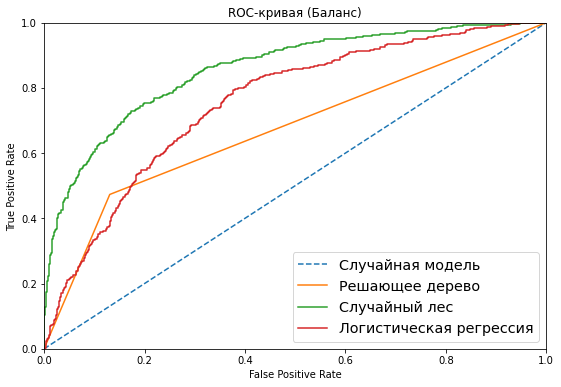

In [25]:
plt.figure(figsize=[9,6])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')


model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
model_tree.fit(features_train,target_train)
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='Решающее дерево')

model_forest =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=11, class_weight='balanced')
model_forest.fit(features_train, target_train)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')

model_regression = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_regression.fit(features_train_reg, target_train)
probabilities_valid = model_regression.predict_proba(features_valid_reg)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая (Баланс)")
plt.show()

После обучения моделей на сбалансированом классе, отмечаем, что лучшие показатели у модели **Случайный лес**. Многие метрики разнятся от модели к модели, F1-мера примерно одинакова у моделей **Решающее дерево** и **Логистическая регрессия** ~0.45, Лучший результат F1 у **Случайного леса**. Сравнивая с предыдущей главой, где мы не обращали внимания на баланс, можно заметить, что все показатели улучшились.  

Попробуем уменьшить выборку функцией **downsampling**.

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
# Соединяем и смешиваем данные

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
display(features_downsampled.shape)
display(target_downsampled.shape)

(2397, 11)

(2397,)

In [27]:
# Проверим на модели решающего дерева:
f1_best = 0
depth_best = 0
for depth in range(2, 18):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_downsampled,target_downsampled)
    prediction = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model_tree.fit(features_downsampled, target_downsampled)
prediction = model_tree.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))
print("AUC-ROC", roc_auc_score(target_valid, prediction))

Max depth 5 F1-score 0.6146435452793834
Accuracy 0.8
Precision 0.5406779661016949
Recall 0.7120535714285714
F1 0.6146435452793834
AUC-ROC 0.7687200846833577


In [28]:
# Теперь случайный лес
f1_best = 0
depth_best = 0

for est in range (30, 31):
    for depth in range(2, 18):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model_forest.fit(features_downsampled, target_downsampled)
        prediction = model_forest.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best:
            f1_best=f1
            est_best=est
            depth_best=depth

print('n_estimators =', est_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
model_forest.fit(features_downsampled, target_downsampled)
prediction = model_forest.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))
print("AUC-ROC", roc_auc_score(target_valid, prediction))

n_estimators = 30 Max depth 5 F1-score 0.6026666666666667
Accuracy 0.7685
Precision 0.4888558692421991
Recall 0.734375
F1 0.5869759143621767
AUC-ROC 0.7563627577319588


In [29]:
model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_downsampled, target_downsampled)
predicted_valid = model_regression.predict(features_valid)

print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print("AUC-ROC", roc_auc_score(target_valid, predicted_valid))

Accuracy 0.6335
Precision 0.33714285714285713
Recall 0.6584821428571429
F1 0.44595616024187457
AUC-ROC 0.6423854013254786


AUC-ROC DecisionTreeClassifier 0.696179756535346
AUC-ROC RandomForestClassifier 0.8398264911634757
AUC-ROC LogisticRegression 0.7043748274116347


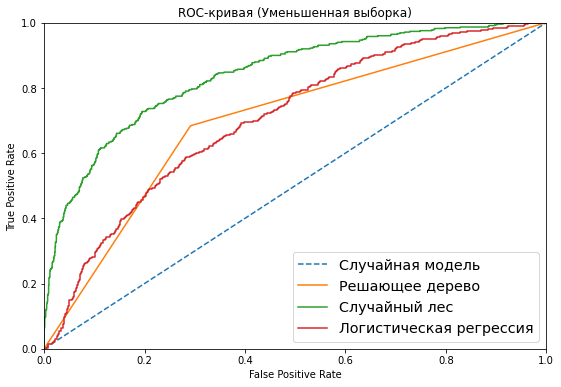

In [30]:
plt.figure(figsize=[9,6])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')


model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
model_tree.fit(features_downsampled, target_downsampled)
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='Решающее дерево')

model_forest =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=11)
model_forest.fit(features_downsampled, target_downsampled)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')

model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_downsampled, target_downsampled)
probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая (Уменьшенная выборка)")
plt.show()

После уменьшения выборки, значение auc-roc понизились у всех моделей, кроме **Решающего дерева**. Тем не менее в лидерах всё равно **Случайный лес**. Значение F1 **Решающего дерева** *0.614*, у остальных моделей всё ещё низко.  

Будем пробовать увеличивать выборку методом upsampling.

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [32]:
#Сначала Решающее дерево

f1_best = 0
depth_best = 0
for depth in range(2, 10):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    prediction = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model_tree.fit(features_upsampled, target_upsampled)
prediction = model_tree.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))
print("AUC-ROC", roc_auc_score(target_valid, prediction))
probabilities_valid = model_tree.predict_proba(features_valid)[:, 1]
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_valid)

Max depth 7 F1-score 0.5464231354642314
Accuracy 0.702
Precision 0.41454965357967666
Recall 0.8013392857142857
F1 0.5464231354642314
AUC-ROC 0.7373320139911634


In [33]:
%%time

# Модель Случайный лес (лучшие данные уже введены)

f1_best = 0
depth_best = 0

for est in range (56, 58):
    for depth in range(15, 17):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model_forest.fit(features_upsampled, target_upsampled)
        prediction = model_forest.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best:
            f1_best=f1
            est_best=est
            depth_best=depth

print('n_estimators =', est_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)
prediction = model_forest.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))
print("AUC-ROC", roc_auc_score(target_valid, prediction))
probabilities_valid = model_forest.predict_proba(features_valid)[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_valid)

n_estimators = 57 Max depth 16 F1-score 0.6105263157894738
Accuracy 0.8335
Precision 0.6412776412776413
Recall 0.5825892857142857
F1 0.6105263157894738
AUC-ROC 0.744258560382916
CPU times: user 3.22 s, sys: 31.7 ms, total: 3.25 s
Wall time: 3.38 s


In [34]:
# Модель Логистическая регрессия
model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_upsampled, target_upsampled)
predicted_valid = model_regression.predict(features_valid)

print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print("AUC-ROC", roc_auc_score(target_valid, predicted_valid))
probabilities_valid = model_regression.predict_proba(features_valid)[:, 1]
fpr_regression, tpr_regression, thresholds = roc_curve(target_valid, probabilities_valid)

Accuracy 0.3425
Precision 0.2507188039102933
Recall 0.9732142857142857
F1 0.39871970736168266
AUC-ROC 0.5668262150220913


Глядя на цифры можно заметить, что лучший результат у модели **Случайный Лес**.  
Построим кривую ошибок.

AUC-ROC DecisionTreeClassifier 0.692897701122975
AUC-ROC RandomForestClassifier 0.8455161542709867
AUC-ROC LogisticRegression 0.7173462812960235


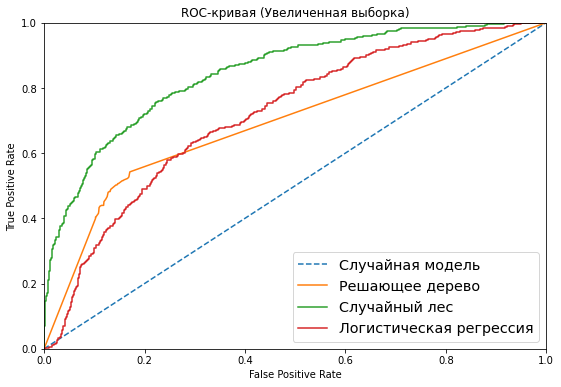

In [35]:
plt.figure(figsize=[9,6])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')


model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
model_tree.fit(features_upsampled, target_upsampled)
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='Решающее дерево')

model_forest =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=11)
model_forest.fit(features_upsampled, target_upsampled)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')

model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_upsampled, target_upsampled)
probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая (Увеличенная выборка)")
plt.show()

Лучшей моделью после увеличения выборки, стала **Случайный лес**. Также, у данной модели самая высокая F1 мера (*0.6105*). Будем тестировать именно её.

## Тестирование модели

Обучим финальную модель

In [36]:
%%time

# Модель Случайный лес (лучшие данные уже введены)

f1_best = 0
depth_best = 0

for est in range (56, 58):
    for depth in range(15, 17):
        model_best = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model_best.fit(features_upsampled, target_upsampled)
        prediction = model_best.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best:
            f1_best=f1
            est_best=est
            depth_best=depth

print('n_estimators =', est_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 57 Max depth 16 F1-score 0.6105263157894738
CPU times: user 2.46 s, sys: 8.27 ms, total: 2.47 s
Wall time: 2.47 s


In [37]:
prediction = model_best.predict(features_test)
print('Accuracy', accuracy_score(target_test, prediction))
print('Precision', precision_score(target_test, prediction))
print('Recall', recall_score(target_test, prediction))
print('F1', f1_score(target_test, prediction))
probabilities_valid = model_best.predict_proba(features_test)[:, 1]
print("AUC-ROC", roc_auc_score(target_test, probabilities_valid))
fpr, tpr, thresholds = roc_curve(target_test, probabilities_valid)

Accuracy 0.8455
Precision 0.6141304347826086
Recall 0.5750636132315522
F1 0.5939553219448095
AUC-ROC 0.8407294106097528


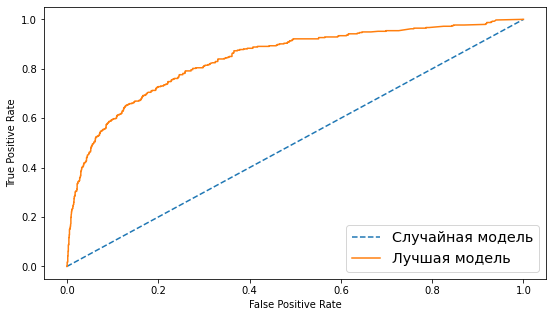

In [38]:
plt.figure(figsize=[9,5])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')
plt.plot(fpr, tpr, label='Лучшая модель')
model_best =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=11)
model_best.fit(features_upsampled, target_upsampled)
probabilities_valid = model_best.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')



В финальной модели нам удалось добиться и достичь поставленой цели, показатель F1-меры обученой модели *0.5939*, модель обладает высокой точностью, и с большой вероятностью подскажет о возможности ухода клиента из банка *0.6141*, модель показывает высокий уровень на метрике AUC-ROC *0.8407*. Также график доказывает, что модель не отвечает случайно. А также удалось достигнуть уровень полноты *0.5750*, модель хорошо ищет положительные объекты.